1699339117.166999
1699339117.167629
1699339117.167914


/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_73011/2833769881.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


1699339248.1450372


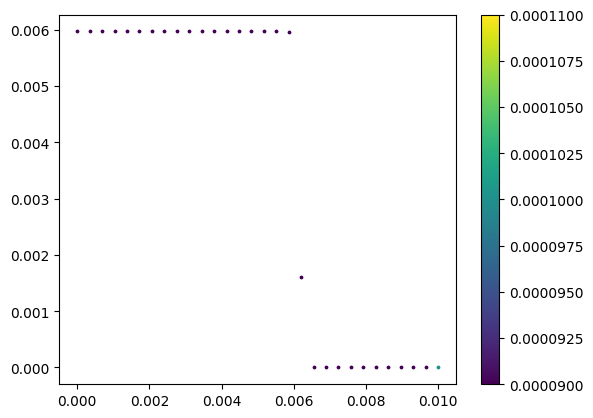

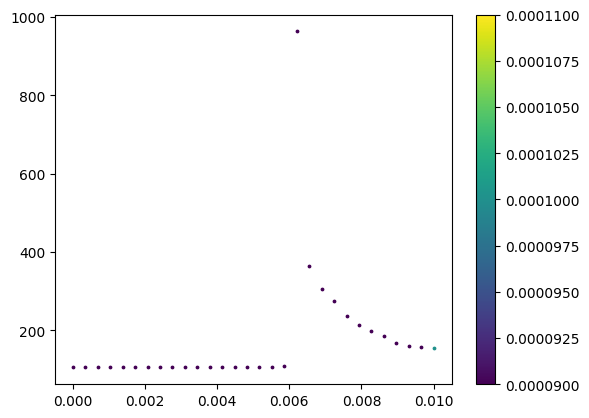

ValueError: 'viridis' is not a valid value for color

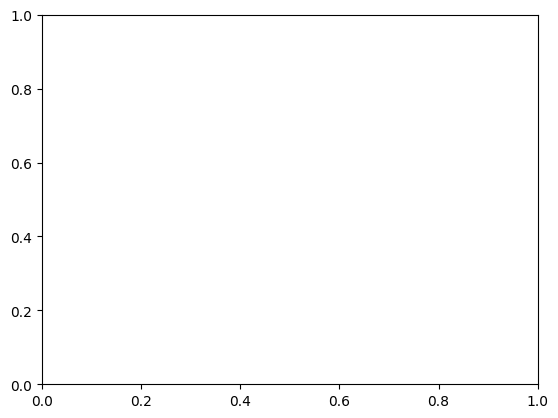

In [18]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time
#from scipy.integrate import quad

print(time())

## gap_eq をdef

def e_k_spin(k1, k2, k3, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*k2)+np.cos(a*k3)) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, k3, q, B):
    return (e_k_spin(k1, k2, k3, q, 1, B) + e_k_spin(-1*k1, k2, k3, q, -1, B))/2

def e_k_a(k1, k2, k3, q, B):
    return (e_k_spin(k1, k2, k3, q, 1, B) - e_k_spin(-1*k1, k2, k3, q, -1, B))/2

def E_k_q(k1, k2, k3, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, k3, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, k3, gap, q, y, B):
    return E_k_q(k1, k2, k3, gap, q, B) + y * e_k_a(k1, k2, k3, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, k3, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, k3, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, k3, gap, q, 1, B)))/(2*E_k_q(k1, k2, k3, gap, q, B))


def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky, kz = meshgrid(k1, k1, k1, indexing='ij')
    f = func(kx, ky, kz, gap, q, B)
    return (V / (N**3)) * sum(f)

print(time())

##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2 =50, 1, 1, 1, 0.3, 1, 30, 1, 1    # 7.525 #9.21
qs   = np.linspace(0,0.01,n0)  #(np.pi/a)
Bs   = np.linspace(0.0,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(0.0001,0.004,n2)

print(time())

##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[j], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append([d0, abs(d1-d0), k])
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

print(time())


##gapのq依存
for j in range(n2):    ##q,gap図
    for i in range(n1):
        ans_q = []
        for h in range(n0):
            ans_q.append(ans[h][i][j][0])
            figure = plt.scatter(qs[h], ans[h][i][j][0], 3, c=kBTs[j],  cmap='viridis' ,vmin=kBTs[0], vmax=kBTs[-1])
c= plt.colorbar()
plt.savefig("FFLO_q-gap(N=100,B=0.00).png")
plt.show()


##反復回数のq依存
for j in range(n2):    ##q,gap図
    for i in range(n1):
        iter_q = []
        for h in range(n0):
            iter_q.append(ans[h][i][j][2])
            figure = plt.scatter(qs[h], ans[h][i][j][2], 3, c=kBTs[j],  cmap='viridis' ,vmin=kBTs[0], vmax=kBTs[-1])
c= plt.colorbar()
plt.savefig("FFLO_q-gap(N=100,B=0.00).png")
plt.show()


##gapの温度依存
for h in range(n0):    ##kBT,gap
    for i in range(n1):
        plt.plot(kBTs, ans[h][i][:,0], label = 'B='+str(Bs[i])+', q='+str(qs[h]) , color='viridis') # 秩序パラメータの温度依存性をプロット
        #plt.plot(kBTs, ans[h][i][:,0], color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2)) # 秩序パラメータの温度依存性をプロッ
#plt.legend(bbox_to_anchor=(1, 1), bbox_inches='tight', loc='upper left', borderaxespad=0, fontsize=12)
    #plt.savefig("gap(q="+str(np.floor(qs[h]))+").png")
plt.legend()
plt.show()


##反復回数の温度依存
for h in range(n0):    ##kBT,反復回数　図
    for i in range(n1):
        plt.plot(kBTs, ans[h][i][:,2],label = 'B='+str(Bs[i])+', q='+str(qs[h]) , color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2)) # 収束に必要だった反復回数のプロット
#plt.legend(bbox_to_anchor=(1, 1), bbox_inches='tight', loc='upper left', borderaxespad=0, fontsize=12)
plt.legend()
plt.show()

print(time())

In [3]:
from numpy import *
a = ones(4).reshape(2,2)
print(a)

[[1. 1.]
 [1. 1.]]
